In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
data = pd.read_csv('poverty.txt', sep='\t')
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [94]:
Brth15to17 = data['Brth15to17']
PovPct = data['PovPct']
ViolCrime = data['ViolCrime']

In [103]:
x = PovPct.values.T
bias = np.ones(x.shape[0])
x = np.vstack((x,ViolCrime.T,bias)).T
y = Brth15to17.values

In [104]:
print(x.shape)

(51, 3)


In [105]:
x_tf = tf.placeholder(tf.float32, shape=(None,None), name='input')
y_tf = tf.placeholder(tf.float32, shape=(None,), name='output')

In [106]:
x_tf_trans = tf.transpose(x_tf)
mat_inv = tf.linalg.inv(tf.matmul(x_tf_trans, x_tf))
weight = tf.matmul(mat_inv, tf.matmul(x_tf_trans, tf.expand_dims(y_tf, axis=1)))

#w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(x_tf), x_tf), tf.transpose(x_tf))), y_tf)

In [107]:
feed_dict = {x_tf: x,
             y_tf: y}

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    output = sess.run(weight, feed_dict=feed_dict)
    print(output)

[[1.0364971 ]
 [0.34420753]
 [5.9822235 ]]


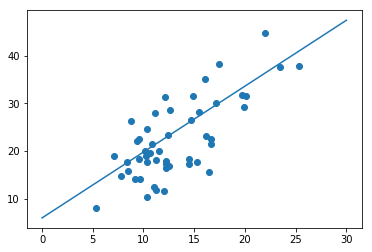

In [113]:
# Now plot against the data
x_line1 = np.linspace(0,300,100)
x_line2 = np.linspace(0,60,100)
y_line = x_line1 * output[0] + x_line1 * output[1] + output[2]

plt.plot(x_line1, y_line)
plt.scatter(PovPct.values, Brth15to17.values)

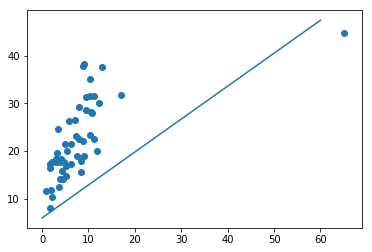

In [114]:
plt.plot(x_line2, y_line)
plt.scatter(ViolCrime.values, Brth15to17.values)